In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_loan=pd.read_csv("loan_prediction.csv")
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_loan.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df_loan.shape

(614, 13)

In [7]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df_loan.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

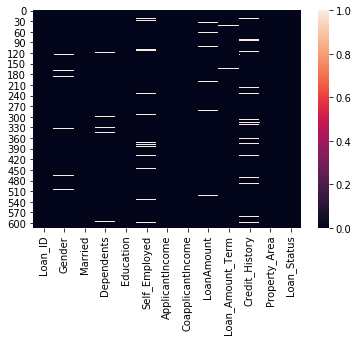

In [10]:
sns.heatmap(df_loan.isnull())

In [11]:
df_loan['Gender'].fillna(method='ffill',inplace=True)

In [12]:
df_loan['Dependents'].fillna(method='ffill',inplace=True)

In [13]:
df_loan['Self_Employed'].fillna(method='ffill',inplace=True)
df_loan['LoanAmount'].fillna(method='ffill',inplace=True)
df_loan['Loan_Amount_Term'].fillna(method='ffill',inplace=True)
df_loan['Credit_History'].fillna(method='ffill',inplace=True)

In [14]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df_loan['Married'].fillna(method='ffill',inplace=True)

In [16]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

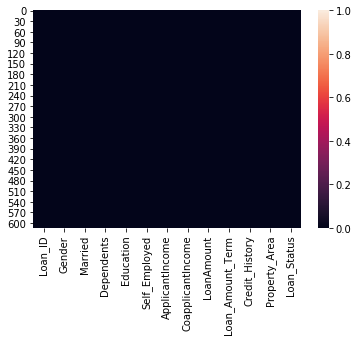

In [17]:
sns.heatmap(df_loan.isnull())

In [18]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
df_loan.shape

(614, 13)

In [20]:
df_loan['LoanAmount']

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
6       95.0
7      158.0
8      168.0
9      349.0
10      70.0
11     109.0
12     200.0
13     114.0
14      17.0
15     125.0
16     100.0
17      76.0
18     133.0
19     115.0
20     104.0
21     315.0
22     116.0
23     112.0
24     151.0
25     191.0
26     122.0
27     110.0
28      35.0
29     120.0
       ...  
584    146.0
585    172.0
586    104.0
587     70.0
588     94.0
589    106.0
590     56.0
591    205.0
592    292.0
593    142.0
594    260.0
595    110.0
596    187.0
597     88.0
598    180.0
599    192.0
600    350.0
601    155.0
602    128.0
603    172.0
604    496.0
605    496.0
606    173.0
607    157.0
608    108.0
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [21]:
df_loan['LoanAmount'] = df_loan['LoanAmount'].replace(np.nan, 0)

In [22]:
df_loan['LoanAmount']

0        0.0
1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
6       95.0
7      158.0
8      168.0
9      349.0
10      70.0
11     109.0
12     200.0
13     114.0
14      17.0
15     125.0
16     100.0
17      76.0
18     133.0
19     115.0
20     104.0
21     315.0
22     116.0
23     112.0
24     151.0
25     191.0
26     122.0
27     110.0
28      35.0
29     120.0
       ...  
584    146.0
585    172.0
586    104.0
587     70.0
588     94.0
589    106.0
590     56.0
591    205.0
592    292.0
593    142.0
594    260.0
595    110.0
596    187.0
597     88.0
598    180.0
599    192.0
600    350.0
601    155.0
602    128.0
603    172.0
604    496.0
605    496.0
606    173.0
607    157.0
608    108.0
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [23]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

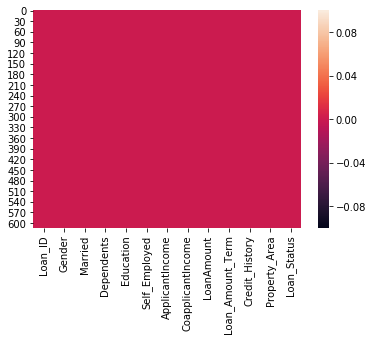

In [24]:
sns.heatmap(df_loan.isnull())

In [25]:
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

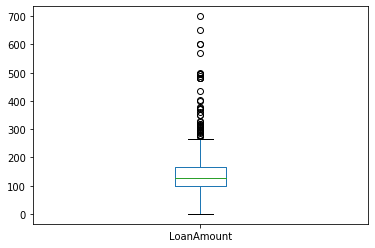

In [26]:
df_loan['LoanAmount'].plot.box()

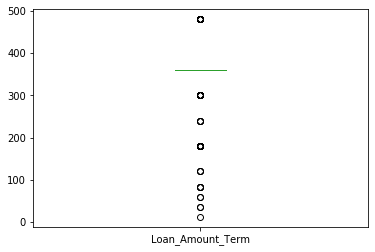

In [27]:
df_loan['Loan_Amount_Term'].plot.box()

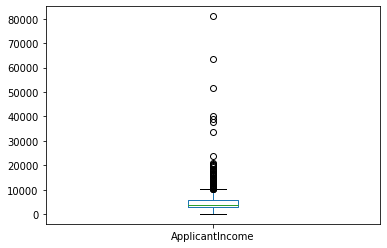

In [28]:
df_loan['ApplicantIncome'].plot.box()

In [29]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
df_loan.Loan_ID.unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [31]:
df_loan1=df_loan.drop("Loan_ID",axis=1)
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
df_loan1.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_loan1["Gender"]=le.fit_transform(df_loan1["Gender"])
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
df_loan1.Married.unique()

array(['No', 'Yes'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_loan1["Married"]=le.fit_transform(df_loan1["Married"])
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
df_loan1.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_loan1["Education"]=le.fit_transform(df_loan1["Education"])
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
df_loan1.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_loan1["Self_Employed"]=le.fit_transform(df_loan1["Self_Employed"])
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,Urban,Y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
df_loan1.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [41]:
df_loan1.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_loan1["Loan_Status"]=le.fit_transform(df_loan1["Loan_Status"])
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [43]:
df_loan1.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [44]:
df_loan1.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [45]:
df_loan1.shape

(614, 12)

In [46]:
df_loan1=df_loan1[df_loan1.Dependents != '3+']

In [47]:
df_loan1.shape

(563, 12)

In [48]:
print('3+' in df_loan1.Dependents)

False


In [49]:
df_loan1.Dependents.unique()

array(['0', '1', '2'], dtype=object)

In [50]:
df_loan1.Dependents=df_loan1.Dependents.astype('int')

In [51]:
df_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [52]:
df_loan1.shape

(563, 12)

In [53]:
df_loan1.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [54]:
dummies=pd.get_dummies(df_loan1.Property_Area)
dummies.head()

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [55]:
merged=pd.concat([df_loan1,dummies],axis='columns')
merged.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,Urban,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,1


In [56]:
final=merged.drop(['Property_Area'],axis='columns')
final

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,1,0,0,1
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,1,0,0,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,0,0,1,0
10,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,1,0,0,1


In [57]:
final.shape

(563, 14)

In [58]:
final.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Rural',
       'Semiurban', 'Urban'],
      dtype='object')

In [59]:
final.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status            int32
Rural                  uint8
Semiurban              uint8
Urban                  uint8
dtype: object

In [60]:
final.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
Gender,1.000000,0.358215,0.149952,0.046637,0.005613,0.040201,0.167278,0.121402,-0.083276,-0.004777,0.009729,0.083835,-0.132864,0.056227
Married,0.358215,1.000000,0.339035,0.006795,0.000490,0.023899,0.141120,0.153181,-0.094057,0.022993,0.095858,-0.006559,-0.005208,0.011625
Dependents,0.149952,0.339035,1.000000,0.025591,0.064573,0.018810,-0.001619,0.067788,-0.048296,-0.045536,0.019748,-0.053898,0.010256,0.041042
Education,0.046637,0.006795,0.025591,1.000000,-0.021269,-0.144741,-0.047155,-0.131857,-0.069206,-0.085720,-0.077406,0.095985,-0.054015,-0.036375
Self_Employed,0.005613,0.000490,0.064573,-0.021269,1.000000,0.184341,-0.009805,0.124646,-0.035545,-0.021189,-0.017534,0.038576,-0.009365,-0.027295
ApplicantIncome,0.040201,0.023899,0.018810,-0.144741,0.184341,1.000000,-0.117556,0.490949,-0.029225,0.038655,-0.002225,-0.026878,0.009230,0.016240
CoapplicantIncome,0.167278,0.141120,-0.001619,-0.047155,-0.009805,-0.117556,1.000000,0.173960,-0.036529,0.021249,-0.011829,0.032571,-0.031533,0.001217
LoanAmount,0.121402,0.153181,0.067788,-0.131857,0.124646,0.490949,0.173960,1.000000,0.051170,0.016692,-0.044319,0.041230,-0.012414,-0.026703
Loan_Amount_Term,-0.083276,-0.094057,-0.048296,-0.069206,-0.035545,-0.029225,-0.036529,0.051170,1.000000,-0.045444,-0.051894,0.029356,0.032127,-0.061083
Credit_History,-0.004777,0.022993,-0.045536,-0.085720,-0.021189,0.038655,0.021249,0.016692,-0.045444,1.000000,0.532001,-0.059786,0.056937,-0.001264


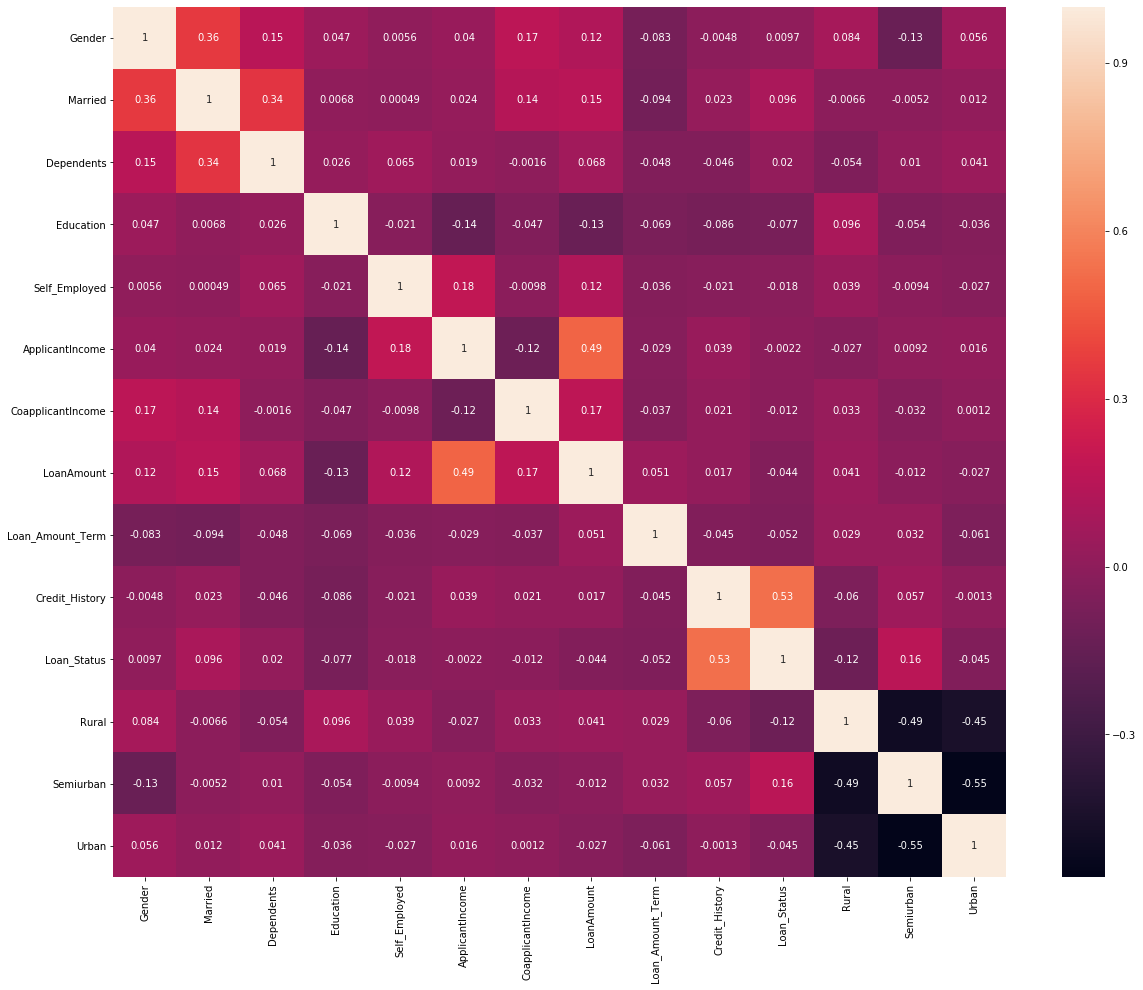

In [61]:
corr_hmap=final.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

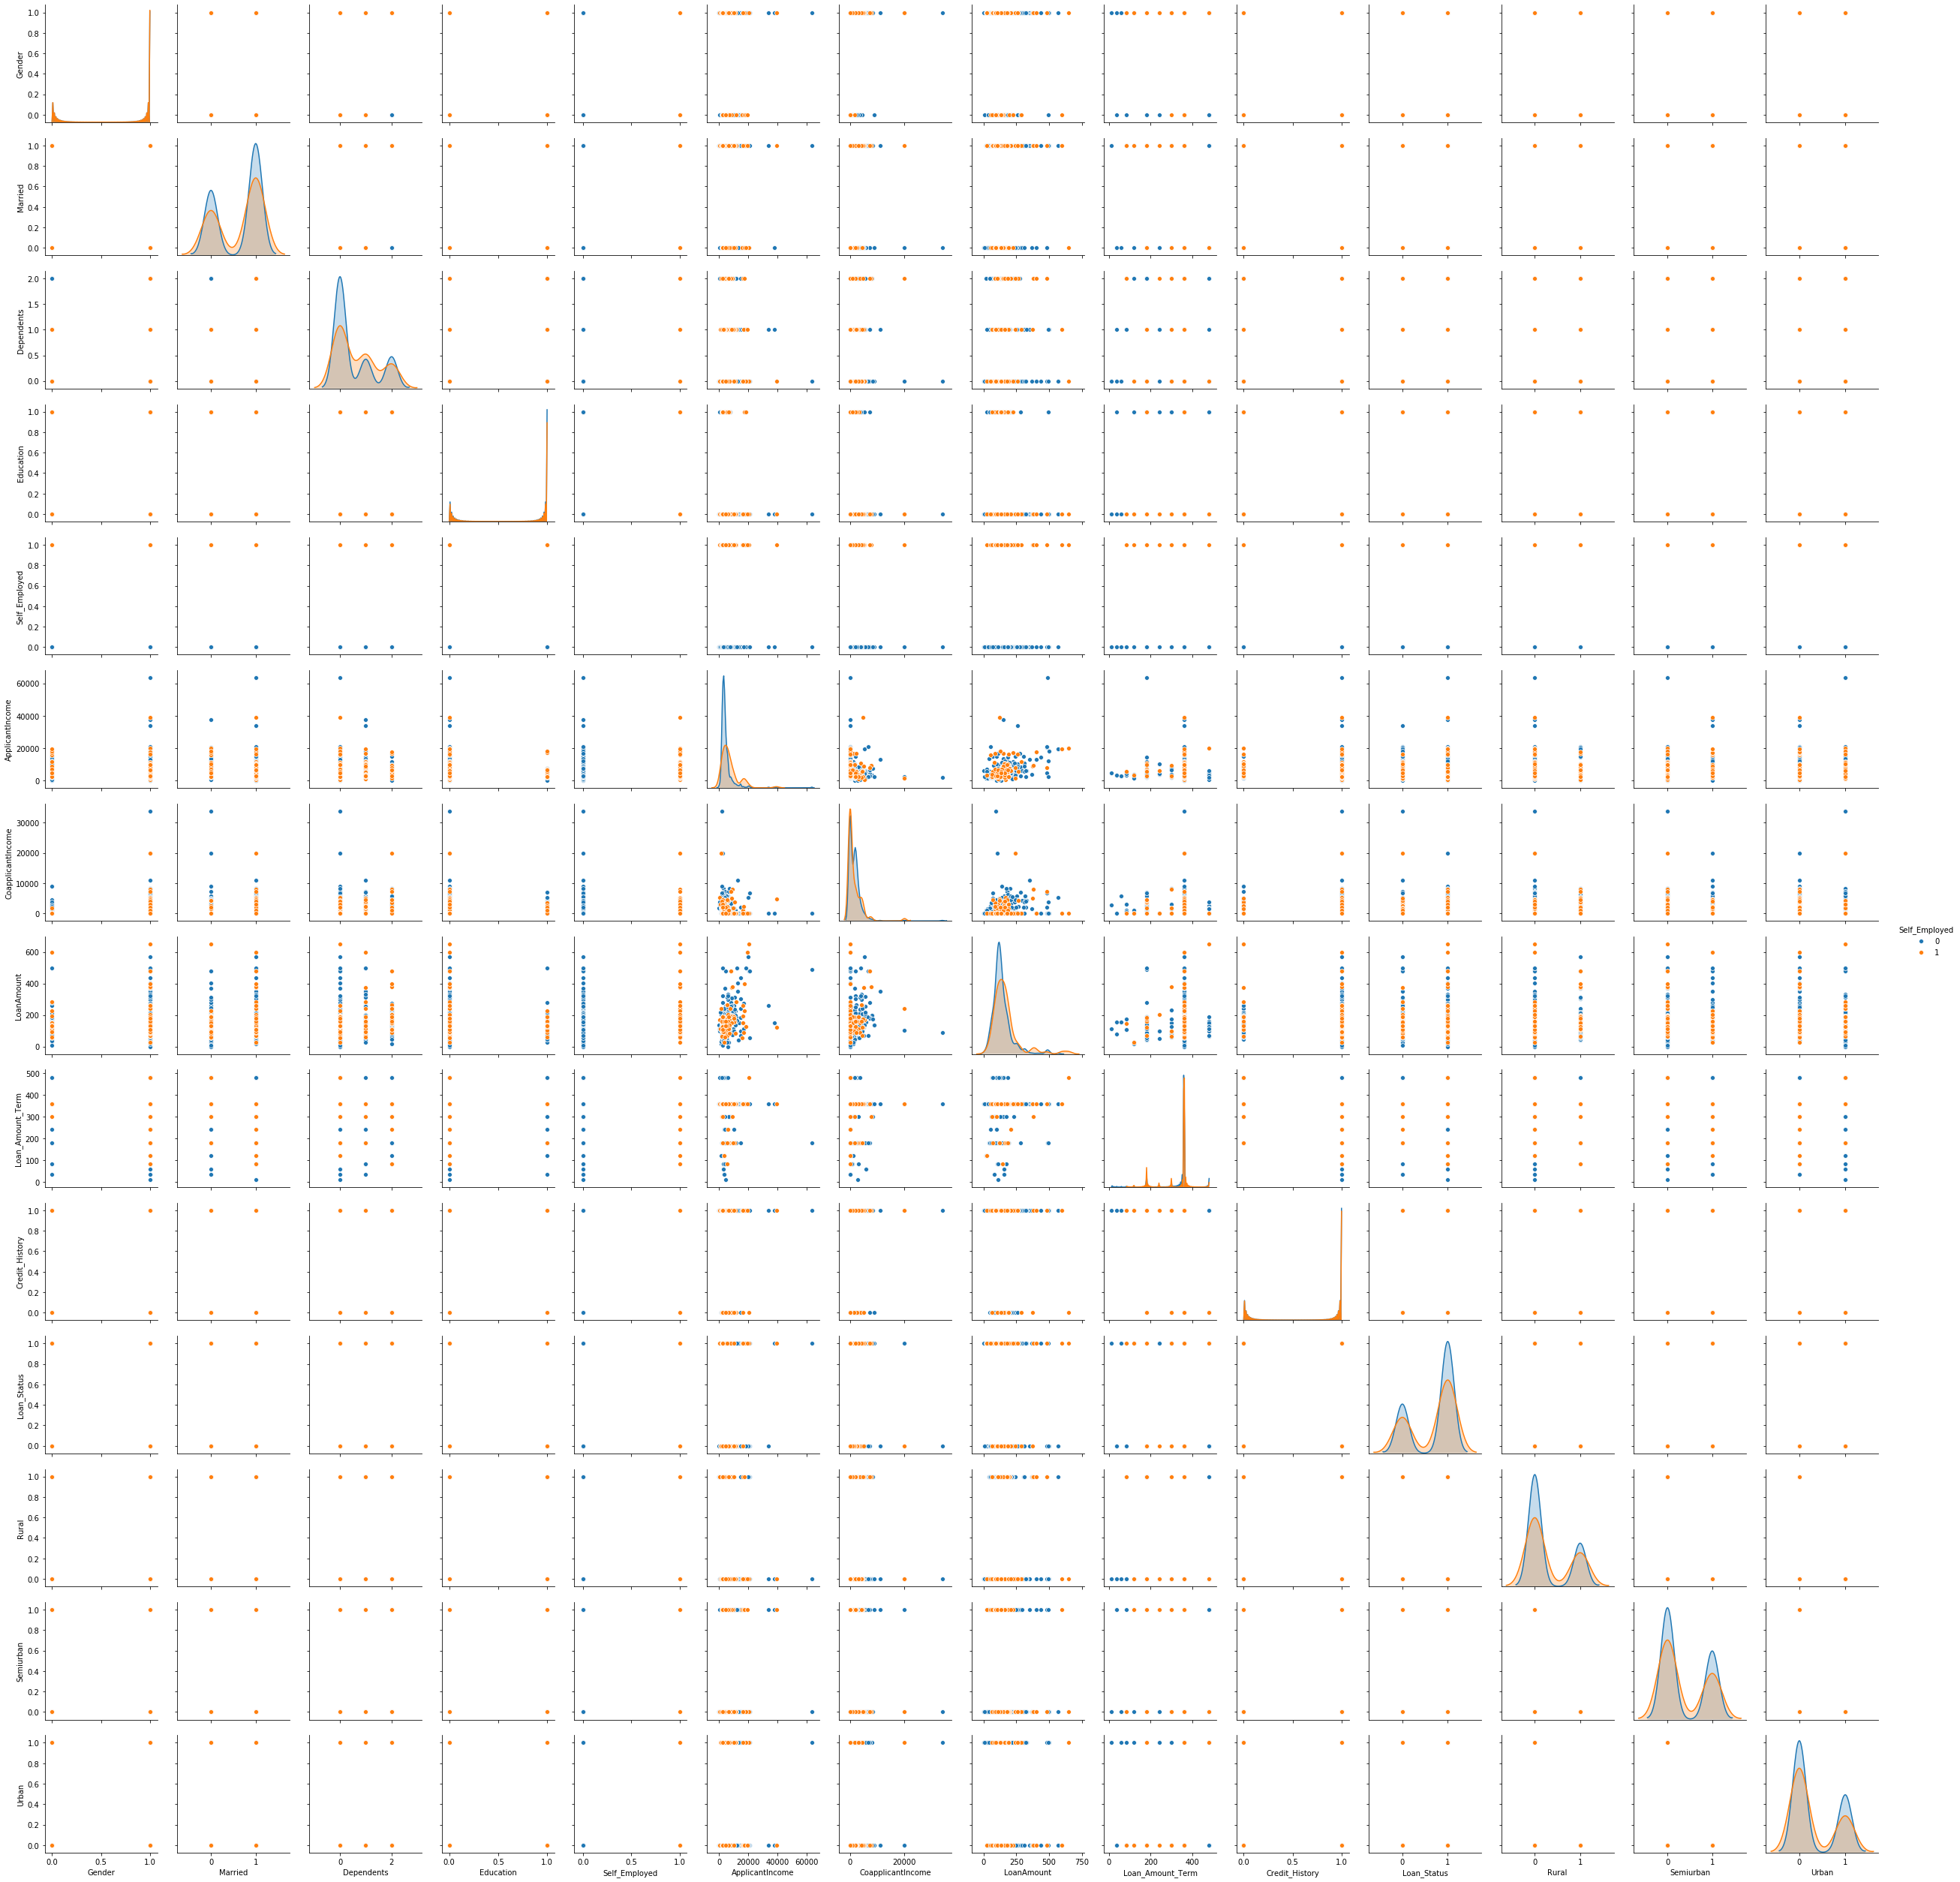

In [62]:
sns.pairplot(final, hue="Self_Employed")

In [63]:
from scipy.stats import zscore
z=np.abs(zscore(final))

In [64]:
z

array([[0.49277338, 1.31141403, 0.70850222, ..., 0.63284873, 0.78010988,
        1.40671105],
       [0.49277338, 0.76253569, 0.56183775, ..., 1.58015645, 0.78010988,
        0.71087804],
       [0.49277338, 0.76253569, 0.70850222, ..., 0.63284873, 0.78010988,
        1.40671105],
       ...,
       [0.49277338, 0.76253569, 0.56183775, ..., 0.63284873, 0.78010988,
        1.40671105],
       [0.49277338, 0.76253569, 1.83217772, ..., 0.63284873, 0.78010988,
        1.40671105],
       [2.02933039, 1.31141403, 0.70850222, ..., 0.63284873, 1.2818707 ,
        0.71087804]])

In [65]:
threshold=3
print(np.where(z>3))

(array([  8,  13,  86, 113, 120, 120, 123, 168, 170, 223, 240, 255, 261,
       284, 284, 289, 307, 307, 338, 338, 368, 382, 397, 407, 447, 455,
       457, 466, 466, 481, 482, 483, 502, 516, 528, 534, 538, 554, 555],
      dtype=int64), array([6, 8, 8, 6, 5, 7, 8, 5, 5, 8, 8, 7, 5, 5, 7, 8, 5, 7, 5, 7, 6, 6,
       7, 5, 7, 8, 8, 5, 7, 7, 7, 7, 8, 7, 8, 6, 8, 7, 7], dtype=int64))


In [66]:
final1=final[(z<3).all(axis=1)]

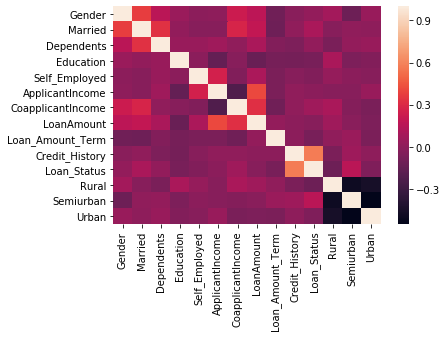

In [67]:
sns.heatmap(final1.corr())

In [68]:
final1.skew()

Gender              -1.516168
Married             -0.546208
Dependents           0.971086
Education            1.360776
Self_Employed        2.152203
ApplicantIncome      2.091974
CoapplicantIncome    1.234600
LoanAmount           1.139288
Loan_Amount_Term    -2.037386
Credit_History      -1.815481
Loan_Status         -0.852840
Rural                0.922254
Semiurban            0.529378
Urban                0.694091
dtype: float64

In [69]:
lm=LinearRegression()

In [70]:
x=final1.drop('Loan_Status',axis='columns')
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0,1


In [71]:
y=final1.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
8      1
10     1
11     1
12     1
13     0
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
      ..
576    0
577    1
578    1
579    1
580    1
582    1
583    0
584    0
586    1
587    1
588    1
589    0
590    1
591    0
593    1
594    1
595    1
596    0
597    0
598    1
599    1
601    1
603    1
606    1
607    1
608    1
609    1
611    1
612    1
613    0
Name: Loan_Status, Length: 529, dtype: int32

In [72]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
x.shape

(529, 13)

In [74]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0,1


In [75]:
#predict with give input
t=np.array([1,0,0,0,0,5849,0.0,0.0,360.0,1.0,0,0,1])

In [76]:
t.shape

(13,)

In [77]:
t=t.reshape(1,-1)

In [78]:
lm.predict(t)

array([0.78579559])

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(34,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=38,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score corresponding to",final_r_state,"is",max_r_score)

r2_score corresponding to random state: 34 is 0.2797594018354558
r2_score corresponding to random state: 35 is 0.37356696100752795
r2_score corresponding to random state: 36 is 0.39120911303943184
r2_score corresponding to random state: 37 is 0.4653323890925585
r2_score corresponding to random state: 38 is 0.29468470967638216
r2_score corresponding to random state: 39 is 0.18322175695222354
r2_score corresponding to random state: 40 is 0.5036207570401332
r2_score corresponding to random state: 41 is 0.5086888050309187
r2_score corresponding to random state: 42 is 0.33835744467733164
r2_score corresponding to random state: 43 is 0.06061430783334765
r2_score corresponding to random state: 44 is 0.06714037378976001
r2_score corresponding to random state: 45 is 0.3996753290530173
r2_score corresponding to random state: 46 is 0.4470136405926013
r2_score corresponding to random state: 47 is 0.09775434926523152
r2_score corresponding to random state: 48 is 0.27795550897235966
r2_score corresp

In [111]:
lm.intercept_

0.2846306593935626

In [112]:
pred=lm.predict(x_test)
print('predicted result',pred)
print('actual price',y_test)

predicted result [ 0.10452288  0.68074602  0.12402763  0.81910904  0.88396024 -0.01106873
  0.74780006  0.8234147   0.92369804  0.69902951  0.80557299  0.76473889
  0.88076935  0.79839367  0.87545916  0.77114507  0.69334252  0.79412678
  0.7206457   0.9037643   0.93981611  0.69858288  0.77447475  0.75760565
  0.79781428  0.15841404  0.87385519  0.79081665  0.78676928  0.82233729
  0.08510736  0.63096778  0.68348998  0.75686418  0.88943717  0.93677157
  0.12958916  0.78074392]
actual price 36     0
302    1
541    0
328    0
204    1
54     0
233    1
573    0
33     1
263    1
386    1
104    1
50     1
53     0
296    1
428    1
226    0
210    0
124    1
12     1
97     1
197    1
6      1
607    1
70     1
451    1
498    1
114    1
57     0
52     0
112    0
480    1
416    0
420    1
115    1
198    1
187    1
570    1
Name: Loan_Status, dtype: int32


In [113]:
print('error')

print('mean absolute error',mean_absolute_error(y_test,pred))


print('mean squared error',mean_squared_error(y_test,pred))


print('root mean absolute error',np.sqrt(mean_squared_error(y_test,pred)))




error
mean absolute error 0.3413849262936748
mean squared error 0.19636547739286683
root mean absolute error 0.44313144482519723


In [114]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.09118029052788545


In [84]:
from sklearn.externals import joblib
joblib.dump(lm,"sbilifeinsurance")

['sbilifeinsurance']